# Исследование закономерностей, определяющих успешность игры 
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

# Описание проекта
*** 
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
***
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Открытие файла и изучение данных

In [153]:
#импорт библиотеки pandas 
import pandas as pd

#импорт библиотеки matplot
import matplotlib.pyplot as plt

#импорт библиотеки seaborn
import seaborn as sns

#импорт библиотек scipy и numpy 
from scipy import stats as st
import numpy as np

In [154]:
#чтение файла 
data = pd.read_csv('/datasets/games.csv')

In [155]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывод: В результате знакомств с данными выявлено: названия столбцов оформлены с заглавной буквы, столбец с данными о годах (year_of_release) имеет не целочисленный формат, есть пропущенные значения в столбцах. 

## Предобработка данных

In [156]:
#вывод первых 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [157]:
#приведения названия столбцов к нижему регистру 
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [158]:
#вывод основной информации о датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [159]:
#вывод уникальных значений
print(data['name'].unique())
print(data['platform'].unique())
print(data['year_of_release'].unique())
print(data['genre'].unique())
print(data['na_sales'].unique())
print(data['eu_sales'].unique())
print(data['jp_sales'].unique())
print(data['other_sales'].unique())
print(data['critic_score'].unique())
print(data['user_score'].unique())
print(data['rating'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.

In [160]:
#устранения некорректного значения tbd в столбце user_score 
def user_scores(wrong_user_scores, correct_user_score):
    data['user_score'] = data['user_score'].replace(wrong_user_scores, correct_user_score)
user_scores('tbd', '0')

In [161]:
#вывод уникальных значений user_score после замены значений
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '0' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [162]:
#удаление пустых строчек столбца year_of_release
data.dropna(subset = ['year_of_release'], inplace = True)
#приведение столбца year_of_release в int
data['year_of_release'] = data['year_of_release'].astype('int32')

#изменение типа данных для столбца user_score
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].astype('float32')

#изменение столбца critic_score
data['critic_score'] = data['critic_score'].astype('float32')

#изменение типа столбца na_sales 
data['na_sales'] = data['na_sales'].astype('float32')

#изменение типа столбца eu_sales
data['eu_sales'] = data['eu_sales'].astype('float32')

#изменение типа столбца jp_sales
data['jp_sales'] = data['jp_sales'].astype('float32')

#изменение типа столбца other_sales
data['other_sales'] = data['other_sales'].astype('float32')

In [163]:
#вывод основной информации о датафрейме после изменения типов данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float32
 5   eu_sales         16446 non-null  float32
 6   jp_sales         16446 non-null  float32
 7   other_sales      16446 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       16446 non-null  float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


In [164]:
#вывод количества пропущенных значений для каждого столбца
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score            0
rating             6678
dtype: int64

In [165]:
#удаление 2х строчек столбца name
data.dropna(subset = ['name'], inplace = True)
#заполнение стоблбца critic_score
data['critic_score'] = data['critic_score'].fillna(0)
#заполнение столбца rating
data['rating'] = data['rating'].fillna('0')

In [166]:
#вывод количества пропущенных значений для каждого столбца
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [167]:
#проверка датафрейма на наличие явных дубликатов 
data.duplicated().sum()

0

In [168]:
#подсчет суммарных продаж региона и сохранение данных в новом столбце general_sales
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
print(data.head())

                       name platform  year_of_release         genre  \
0                Wii Sports      Wii             2006        Sports   
1         Super Mario Bros.      NES             1985      Platform   
2            Mario Kart Wii      Wii             2008        Racing   
3         Wii Sports Resort      Wii             2009        Sports   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   

    na_sales   eu_sales  jp_sales  other_sales  critic_score  user_score  \
0  41.360001  28.959999      3.77         8.45          76.0         8.0   
1  29.080000   3.580000      6.81         0.77           0.0         0.0   
2  15.680000  12.760000      3.79         3.29          82.0         8.3   
3  15.610000  10.930000      3.28         2.95          80.0         8.0   
4  11.270000   8.890000     10.22         1.00           0.0         0.0   

  rating  general_sales  
0      E      82.539993  
1      0      40.240002  
2      E      35.520000  
3      E    

Вывод: Была проведена предобработка данных, выявлены пропущенные значения, приведение названия столбцов к нижнему регистру, проанализированы уникальные значения каждого столбца датафрейма, устранены некорректные значения "tbd" в столбце user_score, удаленые пустые строчки столбца year_of_release и name, также изменены типы данных столбцов year_of_release (приведено к int), user_score (приведено к float), заполнены пропущенные значения столбца critic_score нулями, значения столбца rating тоже заполнены нулями (будем считать, что ограничений нет), также датафрейм проверен на дубликаты. Причины, которые могли повлечь к пропускам в данных: пропуски бывают трех типов - полностью случайные (пропуск не зависит ни от каких-либо других значений), случайные (пропуск зависит от других значений в датафрейме, но не от собственного столбца) и неслучайные (пропуск зависит от значений датафрейма, в том числе и от значений собственного столбца). Поэтому причинами появления пропусков в исходных данных могут быть: человеческий фактор, потеря данных, ошибка в записи данных, намеренно не заполнили данные, как например в столбце rating, user_score, critic_score (особенно актуально для игр выпуска до 2000 года). 

## Исследовательский анализ данных

### Выполнение задания "Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?"

In [169]:
data_games = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
print(data_games)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


Text(0, 0.5, 'Общее количество выпускаемых игр')

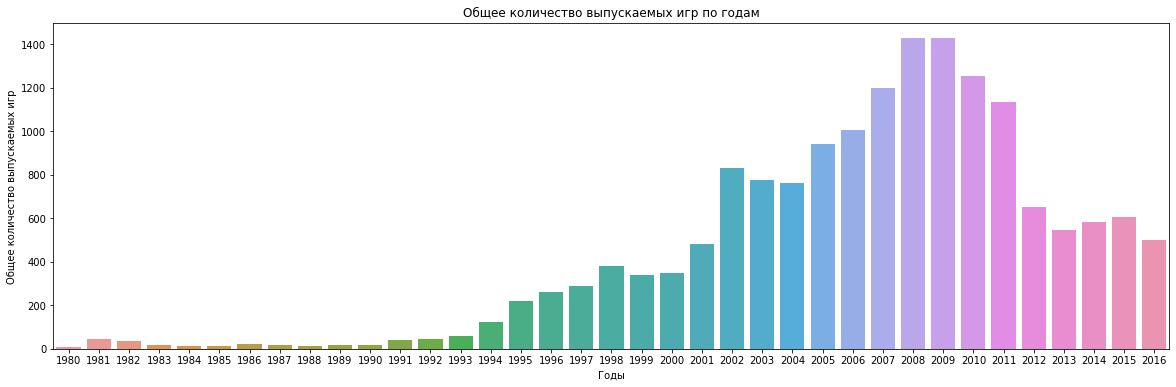

In [211]:
#построение графика по датафрейму data_games
plt.figure(figsize = (20, 6))
sns.barplot(x=data_games.index,y=data_games['name'])
plt.title('Общее количество выпускаемых игр по годам')
plt.xlabel('Годы')
plt.ylabel('Общее количество выпускаемых игр')

Вывод: Из графика видно, что наибольшее количество игр выпускалось в 2008, 2009 году, далее постепенно идет на спад, и продажи снова возрастают в 2014, 2015 году. Данные за все периоды можно не брать, если необходимо сделать прогноз на 2017 год, то можно в расчет взять данные с 2012 года.

### Выполнение задания "Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?"

In [171]:
#создание сводной таблицы по продажам каждой из платформ
data_platform = data.pivot_table(index = ['platform'], values = 'general_sales', aggfunc = 'sum').sort_values(by = 'general_sales', ascending = False)
print(data_platform)

          general_sales
platform               
PS2         1233.559937
X360         961.239990
PS3          931.339966
Wii          891.179993
DS           802.780029
PS           727.580017
PS4          314.140015
GBA          312.880005
PSP          289.529999
3DS          257.809998
PC           255.759995
GB           254.429993
XB           251.569992
NES          251.050003
N64          218.009995
SNES         200.039993
GC           196.729996
XOne         159.320007
2600          86.480003
WiiU          82.190002
PSV           53.810001
SAT           33.590000
GEN           28.350000
DC            15.950000
SCD            1.860000
NG             1.440000
WS             1.420000
TG16           0.160000
3DO            0.100000
GG             0.040000
PCFX           0.030000


Text(0, 0.5, 'Общее количество продаж')

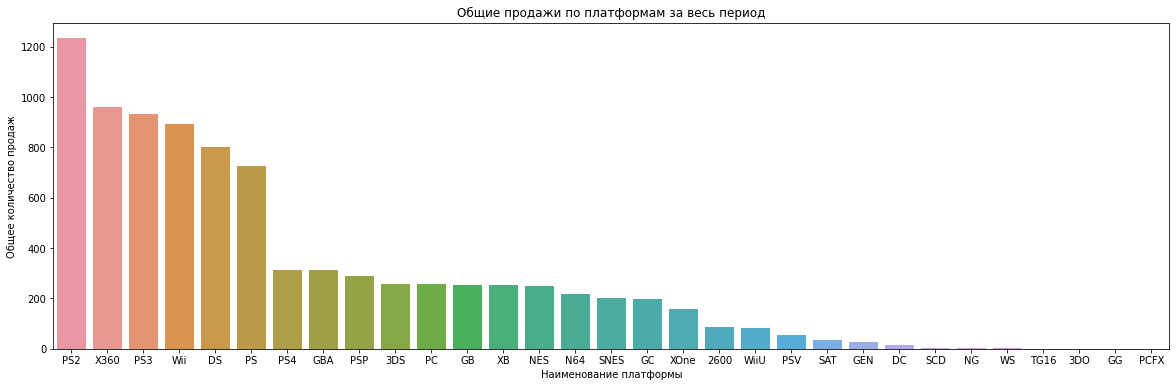

In [210]:
#построение графика по датафрейму data_platform
plt.figure(figsize = (20, 6))
sns.barplot(x=data_platform.index,y=data_platform['general_sales'])
plt.title('Общие продажи по платформам за весь период')
plt.xlabel('Наименование платформы')
plt.ylabel('Общее количество продаж')

In [173]:
#выбор платформ с наибольшей суммой продаж
max_data_platform = data.pivot_table(index = ['platform'], values = 'general_sales', aggfunc = 'sum').sort_values('general_sales', ascending = False)
#print(max_data_platform)
print(max_data_platform.query('general_sales > 700'))

          general_sales
platform               
PS2         1233.559937
X360         961.239990
PS3          931.339966
Wii          891.179993
DS           802.780029
PS           727.580017


In [174]:
#построение сводной таблицы распределения по продаж по годам и платформам  
max_data_platform_year = data.pivot_table(index = ['platform', 'year_of_release',], values = 'general_sales', aggfunc = 'sum')
print(max_data_platform_year)

                          general_sales
platform year_of_release               
2600     1980                 11.380000
         1981                 35.680000
         1982                 28.879999
         1983                  5.840000
         1984                  0.270000
...                                 ...
XB       2008                  0.180000
XOne     2013                 18.960001
         2014                 54.070000
         2015                 60.139999
         2016                 26.150000

[238 rows x 1 columns]


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


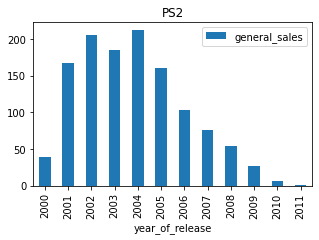

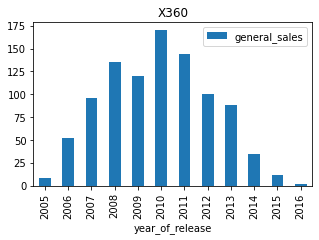

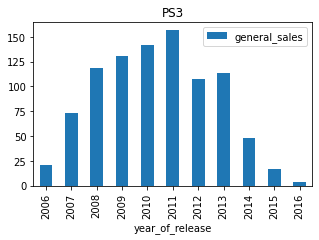

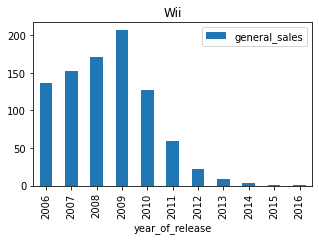

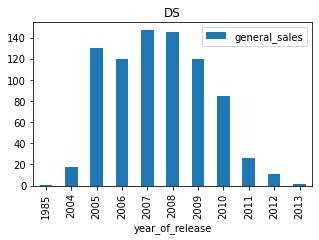

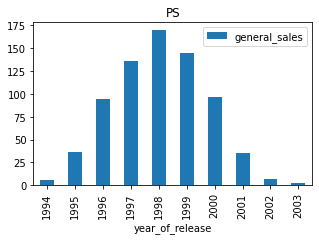

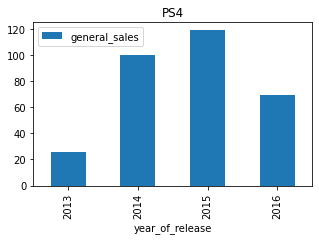

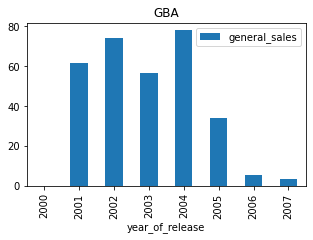

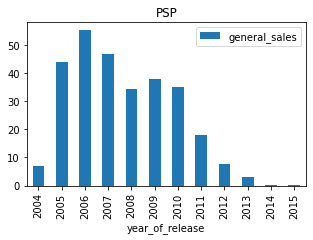

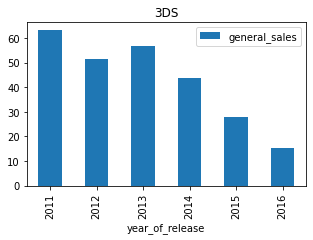

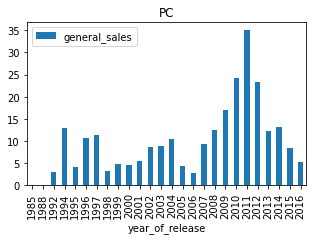

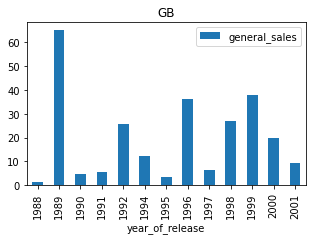

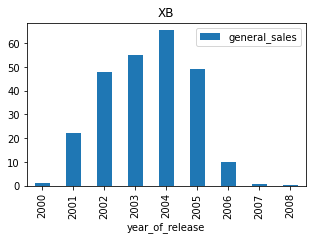

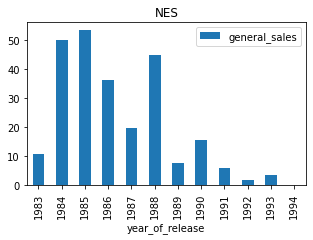

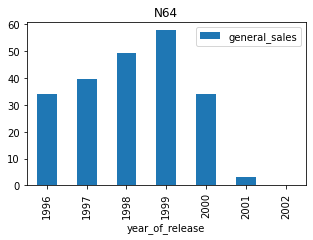

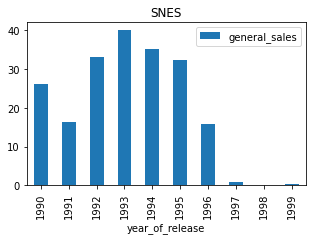

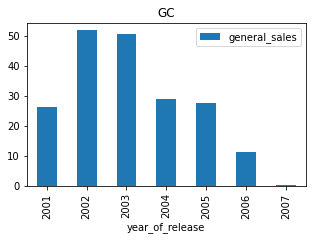

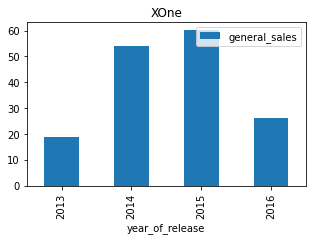

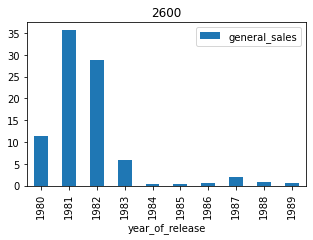

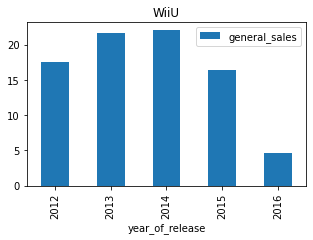

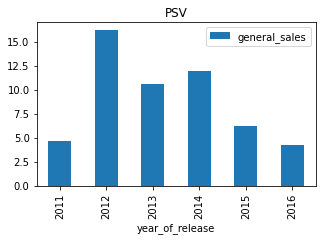

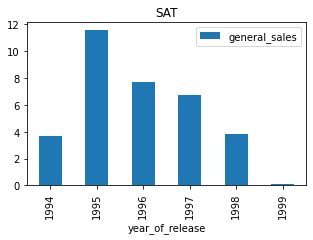

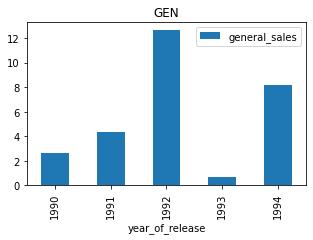

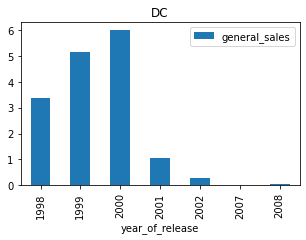

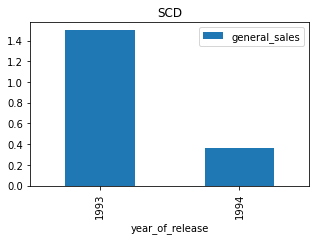

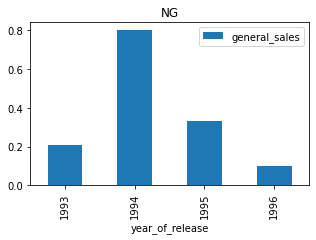

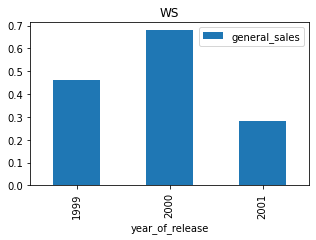

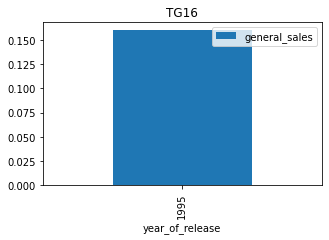

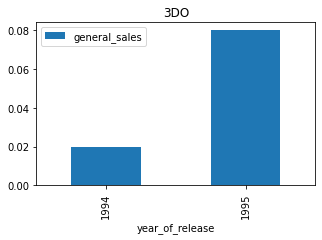

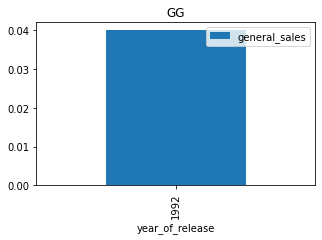

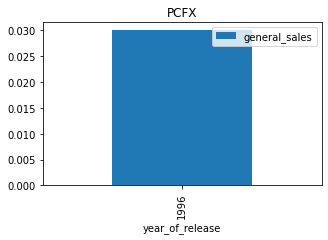

In [175]:
#построение графиков распределения продаж по годам для каждой платформы
max_platform_sales = max_data_platform.index.unique()
for platform in max_platform_sales:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind = 'bar', figsize=(5,3))
    plt.title(platform)

Вывод: Наиболее популярные платформы по продажам: PS2, X360, PS3, Wii, DS, PS. Жизненный цикл платформ составляет примерно 8-10 лет. Многие платформы до начала 2000 годов устарели. Пик по продажам PS2 например был в 2004 году, пик по продажам X360 был в 2010 году, пик по продажам PS3 был в 2011 году, пик по продажам Wii был в 2009 году, пик по продажам DS был в  2007 году, пик по продажам PS был в 2007 году. 

### Выполнение задания "Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ."

In [177]:
#новый датафрейм с данными по годам, начиная с 2012 года. 
new_data = data[data['year_of_release'] > 2011]
new_data = new_data.reset_index(drop = True)
print(new_data)

                               name platform  year_of_release         genre  \
0                Grand Theft Auto V      PS3             2013        Action   
1                Grand Theft Auto V     X360             2013        Action   
2         Call of Duty: Black Ops 3      PS4             2015       Shooter   
3               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
4        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                             ...      ...              ...           ...   
2881               Strawberry Nauts      PSV             2016     Adventure   
2882               Aiyoku no Eustia      PSV             2014          Misc   
2883  Samurai Warriors: Sanada Maru      PS3             2016        Action   
2884        Haitaka no Psychedelica      PSV             2016     Adventure   
2885            Winning Post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  other_sales  cr

In [178]:
new_data_platform = new_data.pivot_table(index = ['platform'], values = 'general_sales', aggfunc = 'sum').sort_values('general_sales', ascending = False)
print(new_data_platform)

          general_sales
platform               
PS4          314.140015
PS3          288.790009
X360         236.540009
3DS          194.610001
XOne         159.320007
WiiU          82.190002
PC            62.650002
PSV           49.180000
Wii           35.369999
DS            12.550000
PSP           11.190000


In [179]:
#вывод наиболее прибыльных платформ 
games = new_data.query("platform == ['PS4', 'PS3', 'X360']")
games = games.reset_index(drop = True)
print(games)

                               name platform  year_of_release    genre  \
0                Grand Theft Auto V      PS3             2013   Action   
1                Grand Theft Auto V     X360             2013   Action   
2         Call of Duty: Black Ops 3      PS4             2015  Shooter   
3        Call of Duty: Black Ops II      PS3             2012  Shooter   
4        Call of Duty: Black Ops II     X360             2012  Shooter   
...                             ...      ...              ...      ...   
1172            Tour de France 2014      PS3             2014   Sports   
1173             Ben 10 Omniverse 2     X360             2013   Action   
1174  Tsukigime Ranko's Longest Day      PS3             2014   Action   
1175   Dynasty Warriors: Eiketsuden      PS3             2016   Action   
1176  Samurai Warriors: Sanada Maru      PS3             2016   Action   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         7.02      9.09      0.98

<AxesSubplot:xlabel='platform', ylabel='general_sales'>

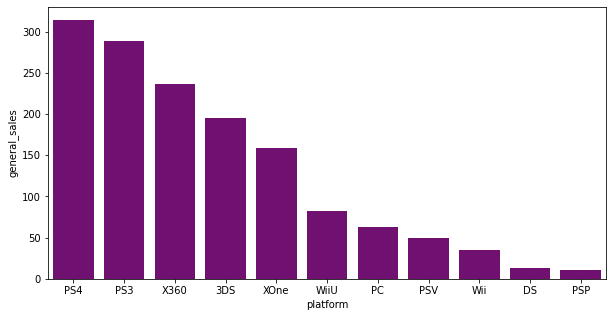

In [180]:
plt.figure(figsize = (10, 5))
sns.barplot(x = new_data_platform.index, y = new_data_platform['general_sales'], color = 'purple')

Вывод: Выбраны топ-3 потенциально прибыльных платформ, начиная с 2012 года: PS4, PS3, X360. 
Наименее прибыльные платформы: Wii, DS, PSP.

# Указать какие потенциально прибыльные платформы по графикам

### Выполнение задания "Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат."

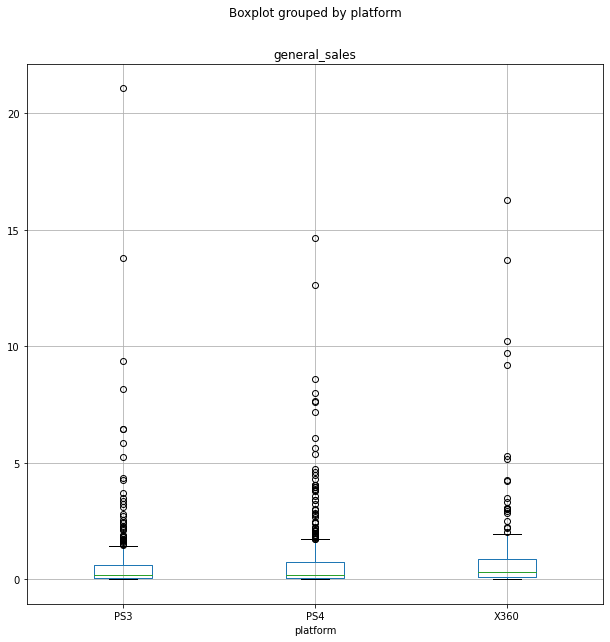

In [181]:
#построение диаграммы размаха для столбца general_sales по platform 
games.boxplot(column='general_sales', by='platform', figsize = (10,10))
plt.show()

Вывод: На графике есть выбросы по каждой из популярных платформ, это приходится на пик продаж каждой платформы c 2012 года. Эти платформы выпускали наиболее популярные игры, такие как Grand Theft Auto, Call of Duty, FIFA, Minecraft, Fallout, The Witcher и другие. 

### Выполнение задания "Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы."

In [182]:
#датафрейм со значениями critic_score > 0 
games_critic_score = games[games['critic_score'] > 0]

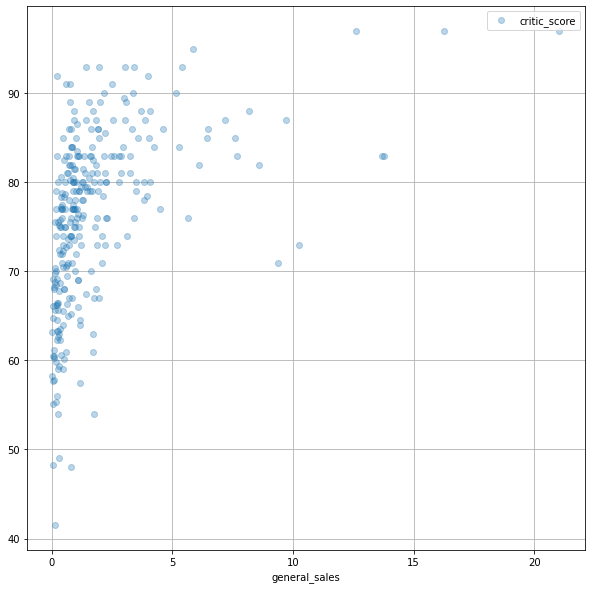

Зависимость продаж от оценки критиков 0.36304141917166244


In [183]:
#зависимость продаж от оценки критиков 
(
    games_critic_score.pivot_table(index='general_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(10, 10), alpha = 0.3)
)
plt.show()
print('Зависимость продаж от оценки критиков', games_critic_score['critic_score'].corr(games_critic_score['general_sales']))

In [184]:
#датафрейм со значениями user_score > 0 
games_user_score = games[games['user_score'] > 0]

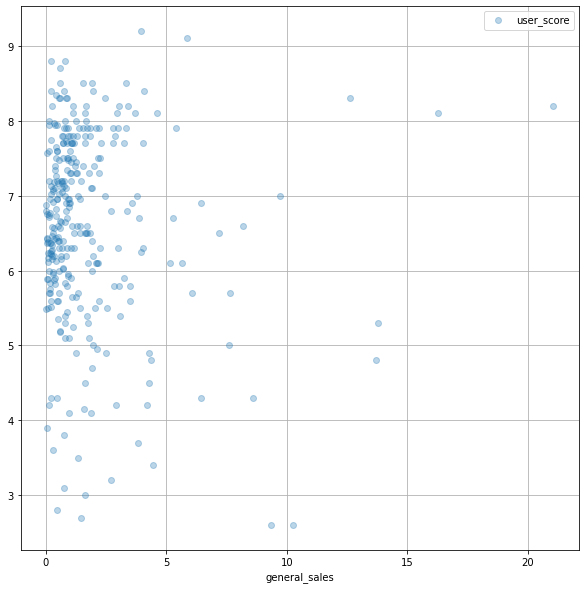

Зависимость продаж от оценки пользователей -0.007889146230922971


In [185]:
#зависимость продаж от оценки пользователей 
(
    games_user_score.pivot_table(index='general_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(10, 10), alpha = 0.3)
)
plt.show()
print('Зависимость продаж от оценки пользователей', games_user_score['user_score'].corr(games_user_score['general_sales']))

In [186]:
#зависимость между оценками критиков и продажами платформы PS4 
ps_corr = games_critic_score[games_critic_score['platform']=='PS4']
print('Зависимость между оценками критиков и продажами платформы PS4:', ps_corr['critic_score'].corr(ps_corr['general_sales']))

Зависимость между оценками критиков и продажами платформы PS4: 0.40656790102834933


In [187]:
#зависимость между оценками пользователей и продажами платформы PS4 
ps_corr = games_user_score[games_user_score['platform']=='PS4']
print('Зависимость между оценками пользователей и продажами платформы PS4:', ps_corr['user_score'].corr(ps_corr['general_sales']))

Зависимость между оценками пользователей и продажами платформы PS4: -0.031957105603966945


Вывод: Для выявления зависимости между оценками пользователей, оценками критиков и суммарными продажами выбрана самая популярная платорма PS4. Зависимость между оценками критиков и продажами платформы составила 41%, зависимость между оценками пользователей и продажами платформы составила -3%. Корреляции между оценками критиков, оценками пользователей и продажами отличаются. При выборе той или иной платформы, пользователь руководствуется оценками критиков.  

### Выполнение задания "Соотнесите выводы с продажами игр на других платформах."

In [188]:
#датафрейм со значениями user_score > 0
new_data_user_score = new_data[new_data['user_score'] > 0]

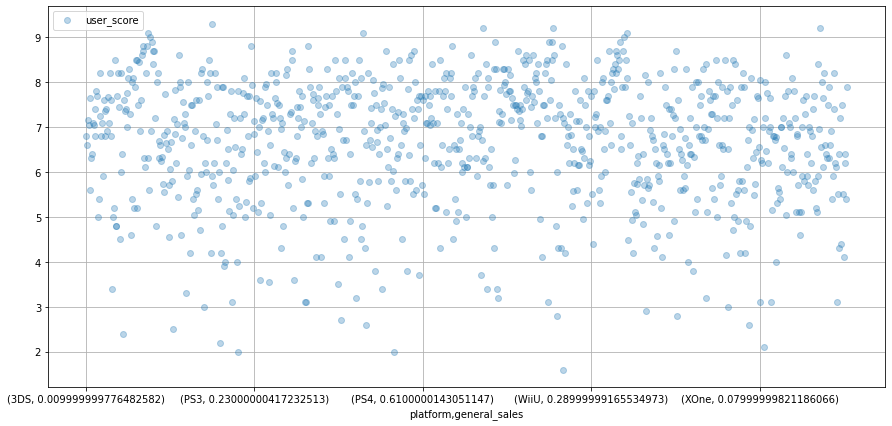

Зависимость продаж от оценки пользователей 0.004428819763759416


In [189]:
#зависимость продаж платформ от оценки пользователей
(
    new_data_user_score.pivot_table(index=['platform','general_sales'], values='user_score')
    .plot(grid=True, style='o', figsize=(15, 7), alpha = 0.3)
)
plt.show()
print('Зависимость продаж от оценки пользователей', new_data_user_score['user_score'].corr(new_data_user_score['general_sales']))

In [190]:
#датафрейм со значениями critic_score > 0
new_data_critic_score = new_data[new_data['critic_score'] > 0]

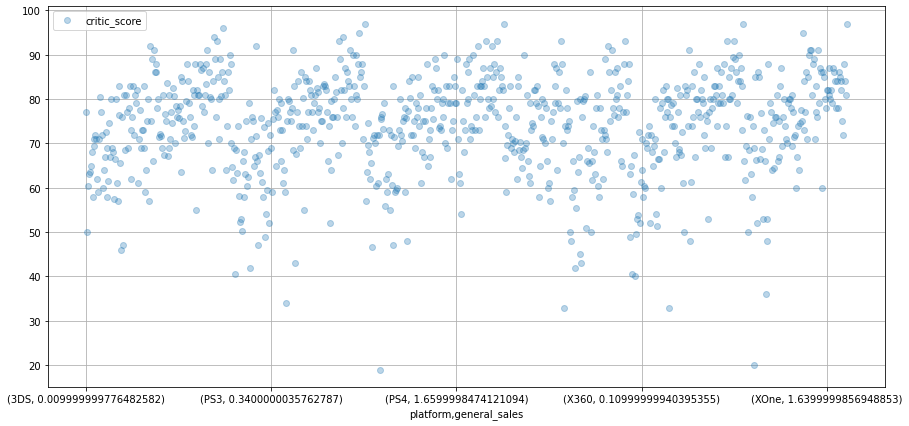

Зависимость продаж от оценки критиков 0.30819674816167564


In [191]:
#зависимость продаж платформ от оценки критиков
(
    new_data_critic_score.pivot_table(index=['platform', 'general_sales'], values='critic_score')
    .plot(grid=True, style='o', figsize=(15, 7), alpha = 0.3)
)
plt.show()
print('Зависимость продаж от оценки критиков', new_data_critic_score['critic_score'].corr(new_data_critic_score['general_sales']))

Вывод: Зависимость между оценками пользователей и продажами различных платформ составило 0.4%, зависимость между оценками критиков и продажами различных платформ составило 31%. Корреляции между оценками критиков, оценками пользователей и продажами отличаются. При выборе той или иной платформы, пользователь руководствуется оценками критиков. 

### Выполнение задания "Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?"

Text(0.5, 1.0, 'PCFX')

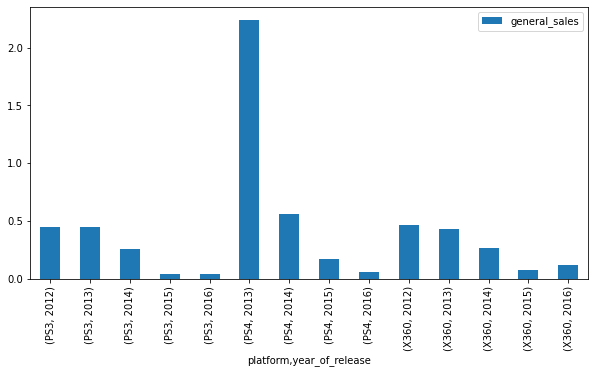

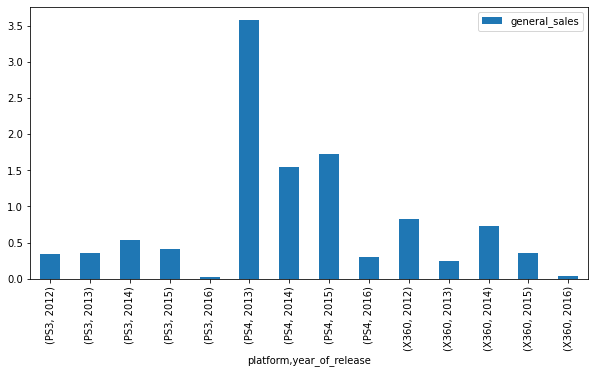

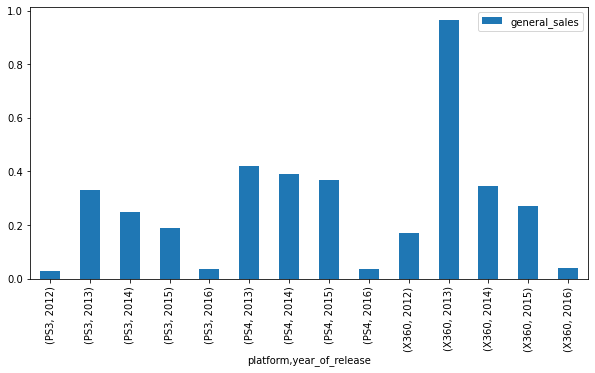

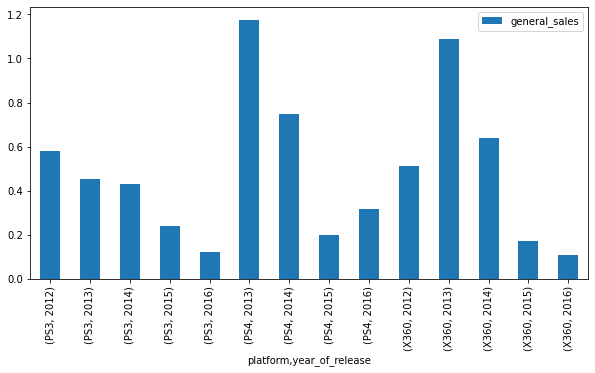

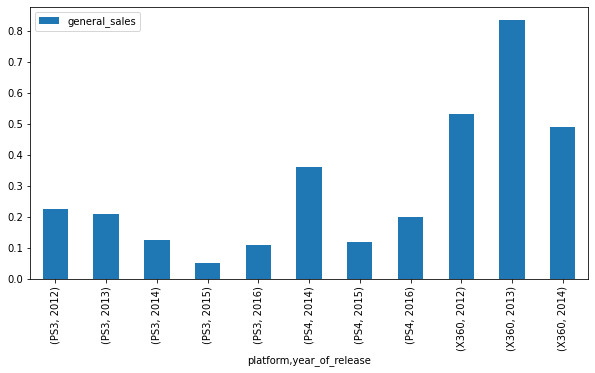

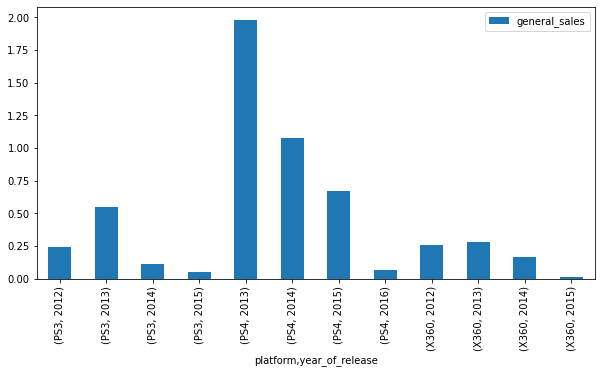

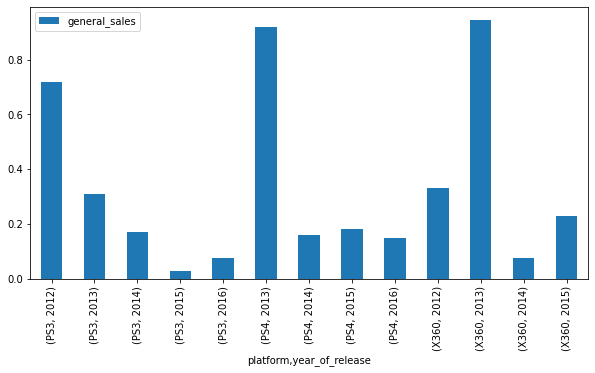

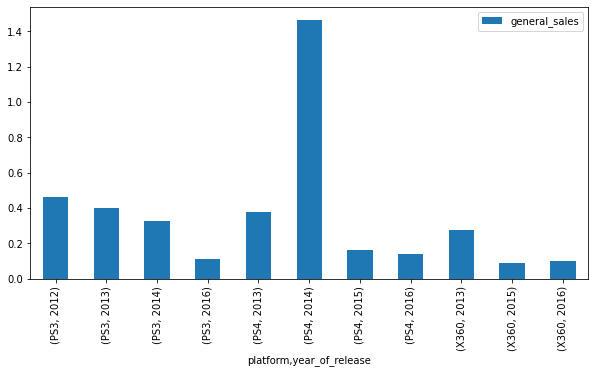

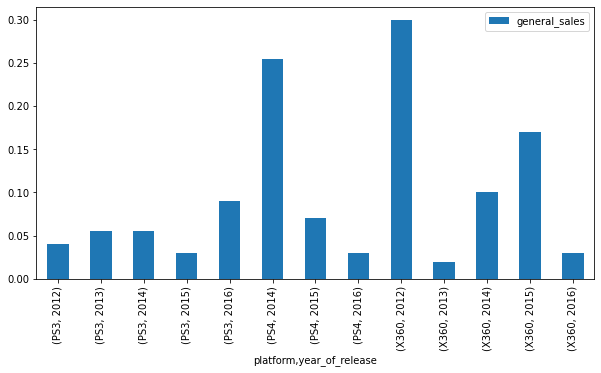

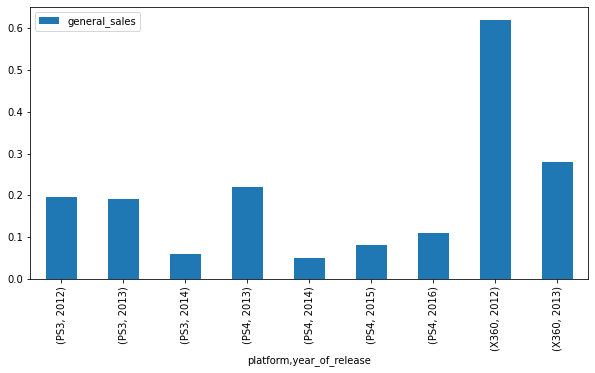

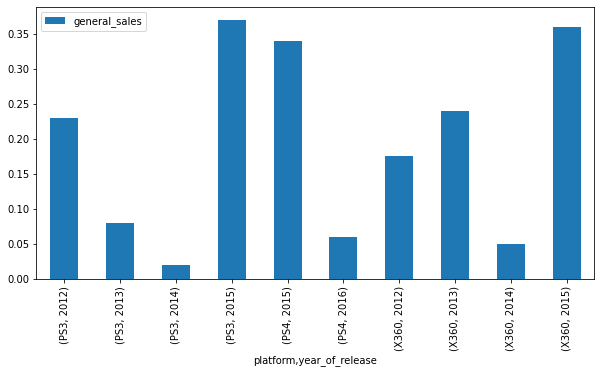

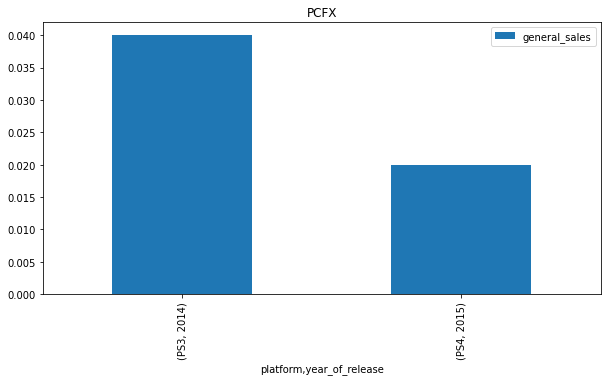

In [192]:
#распределения по жанрам игр для каждой платформы
genre = games['genre'].unique()
for genre in genre:
    games[games['genre'] == genre].pivot_table(index=['platform','year_of_release'], values='general_sales', aggfunc='median').plot(kind = 'bar', figsize=(10,5))
plt.title(platform)

Text(0, 0.5, 'Общее количество продаж')

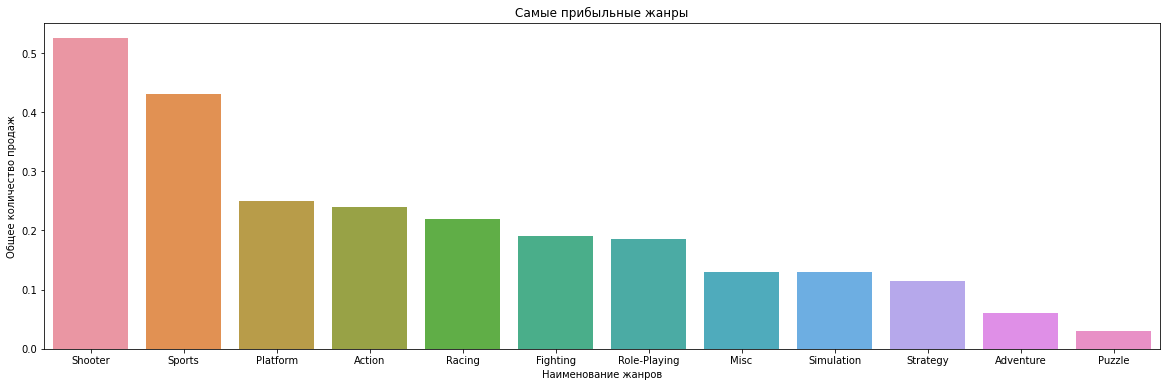

In [220]:
#построение графика самых прибыльных жанров 
genre = games.pivot_table(index = ['genre'], values = 'general_sales', aggfunc = 'median').sort_values(by = 'general_sales', ascending = False)
plt.figure(figsize = (20, 6))
sns.barplot(x=genre.index,y=genre['general_sales'])
plt.title('Самые прибыльные жанры')
plt.xlabel('Наименование жанров')
plt.ylabel('Общее количество продаж')

Вывод: Самыми прибыльными жанрами игр являются Shooter, Sports, Platform, Action, Racing. Самыми неприбыльными жанрами игр являются Adventure и Puzzle. 

## Составьте портрет пользователя каждого региона

### Выполнение задания "Самые популярные платформы (топ-5). Опишите различия в долях продаж."

In [194]:
#создание нового датафрейма с данными, начиная с 2012 года
portrait_data = data[data['year_of_release'] > 2011].reset_index(drop = True)
print(portrait_data.head())

                         name platform  year_of_release         genre  \
0          Grand Theft Auto V      PS3             2013        Action   
1          Grand Theft Auto V     X360             2013        Action   
2   Call of Duty: Black Ops 3      PS4             2015       Shooter   
3         Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
4  Call of Duty: Black Ops II      PS3             2012       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      7.02      9.09      0.98         3.96          97.0         8.2      M   
1      9.66      5.14      0.06         1.41          97.0         8.1      M   
2      6.03      5.86      0.36         2.38           0.0         0.0      0   
3      5.28      4.19      4.35         0.78           0.0         0.0      0   
4      4.99      5.73      0.65         2.42          83.0         5.3      M   

   general_sales  
0      21.049999  
1      16.270000  
2      14.630000 

In [195]:
#создание сводной таблицы по продажам платформ для каждого региона 
portrait_user = (
    portrait_data.pivot_table(index = 'platform', aggfunc='sum')[['na_sales','eu_sales','jp_sales','other_sales','general_sales']]
    .sort_values('general_sales', ascending = False)
)
portrait_user

,na_sales,eu_sales,jp_sales,other_sales,general_sales
platform,,,,,
PS4,108.739998,141.089996,15.960000,48.349998,314.140015
PS3,103.379997,106.860001,35.290001,43.259998,288.790009
X360,140.050003,74.519997,1.570000,20.400000,236.540009
3DS,55.310001,42.639999,87.790001,8.870000,194.610001
XOne,93.120003,51.590000,0.340000,14.270000,159.320007
WiiU,38.099998,25.129999,13.010000,5.950000,82.190002
PC,19.120001,37.759998,0.000000,5.770000,62.650002
PSV,10.980000,11.360000,21.039999,5.800000,49.180000
Wii,17.450001,11.920000,3.390000,2.610000,35.369999


In [196]:
#подсчет долей продаж для каждой из платформ 
def sales(row):
      
    row.na_sales = round(row.na_sales/row.general_sales,2)
    row.eu_sales = round(row.eu_sales/row.general_sales,2)
    row.jp_sales = round(row.jp_sales/row.general_sales,2)
    row.other_sales = round(row.other_sales/row.general_sales,2)
    return row
    
portrait_user_part = portrait_user.apply(sales, axis=1)
portrait_user_part

,na_sales,eu_sales,jp_sales,other_sales,general_sales
platform,,,,,
PS4,0.35,0.45,0.05,0.15,314.140015
PS3,0.36,0.37,0.12,0.15,288.790009
X360,0.59,0.32,0.01,0.09,236.540009
3DS,0.28,0.22,0.45,0.05,194.610001
XOne,0.58,0.32,0.00,0.09,159.320007
WiiU,0.46,0.31,0.16,0.07,82.190002
PC,0.31,0.60,0.00,0.09,62.650002
PSV,0.22,0.23,0.43,0.12,49.180000
Wii,0.49,0.34,0.10,0.07,35.369999


<AxesSubplot:title={'center':'Доля продажи платформ в регионах'}, xlabel='platform'>

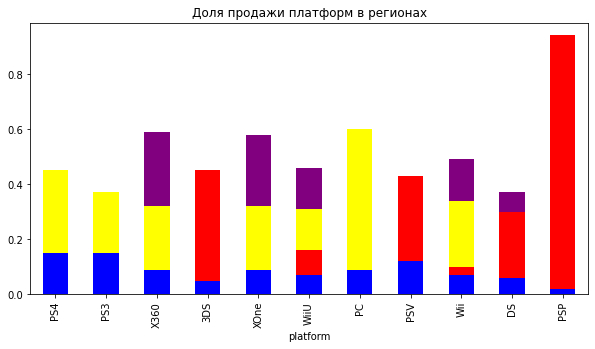

In [197]:
#создание графиков для каждого региона по долям продаж разных платформ
portrait_user_part['na_sales'].plot(kind = 'bar', figsize=(10,5), color='purple', title = 'Доля продажи платформ в регионах')
portrait_user_part['eu_sales'].plot(kind = 'bar', figsize=(10,5), color='yellow', title = 'Доля продажи платформ в регионах')
portrait_user_part['jp_sales'].plot(kind = 'bar', figsize=(10,5), color='red', title = 'Доля продажи платформ в регионах')
portrait_user_part['other_sales'].plot(kind = 'bar', figsize=(10,5), color='blue', title = 'Доля продажи платформ в регионах')

Вывод: Наиболее популярными платформами в Америке являются: X360, XOne, WiiU, Wii, DS.
Наиболее популярными платформами в Европе являются: PC, PS4, Wii, PS3, XOne.
Наиболее популярными платформами в Японии являются: PSP, 3DS, PSV, DS, WiiU. 
Наиболее популярными платформами в остальных регионах являются: PS4, PS3, PSV, XOne, X360.   

### Выполнение задания "Самые популярные жанры (топ-5). Поясните разницу."

In [198]:
#создание сводной таблицы по продажам жанров игр для каждого региона 
portrait_user_genre = (
    portrait_data.pivot_table(index = 'genre', aggfunc='sum')[['na_sales','eu_sales','jp_sales','other_sales','general_sales']] 
    .sort_values('general_sales', ascending = False)
)
portrait_user_genre

,na_sales,eu_sales,jp_sales,other_sales,general_sales
genre,,,,,
Action,177.839996,159.339996,52.799999,51.139999,441.119995
Shooter,144.770004,113.470001,9.230000,37.260002,304.730011
Role-Playing,64.000000,48.529999,65.440002,14.830000,192.800003
Sports,81.529999,69.089996,8.010000,22.440001,181.070007
Misc,38.189999,26.320000,12.860000,7.670000,85.040001
Platform,25.379999,21.410000,8.630000,5.580000,61.000000
Racing,17.219999,27.290001,2.500000,6.490000,53.500000
Fighting,19.789999,10.790000,9.440000,4.470000,44.489998
Simulation,7.970000,14.550000,10.410000,2.190000,35.119999


In [199]:
#подсчет долей продаж для каждого жанра
def genre(row):
      
    row.na_sales = round(row.na_sales/row.general_sales,2)
    row.eu_sales = round(row.eu_sales/row.general_sales,2)
    row.jp_sales = round(row.jp_sales/row.general_sales,2)
    row.other_sales = round(row.other_sales/row.general_sales,2)
    return row
    
portrait_user_genre_part = portrait_user_genre.apply(genre, axis=1)
portrait_user_genre_part

,na_sales,eu_sales,jp_sales,other_sales,general_sales
genre,,,,,
Action,0.40,0.36,0.12,0.12,441.119995
Shooter,0.48,0.37,0.03,0.12,304.730011
Role-Playing,0.33,0.25,0.34,0.08,192.800003
Sports,0.45,0.38,0.04,0.12,181.070007
Misc,0.45,0.31,0.15,0.09,85.040001
Platform,0.42,0.35,0.14,0.09,61.000000
Racing,0.32,0.51,0.05,0.12,53.500000
Fighting,0.44,0.24,0.21,0.10,44.489998
Simulation,0.23,0.41,0.30,0.06,35.119999


<AxesSubplot:title={'center':'Доля продажи игровых жанров в регионах'}, xlabel='genre'>

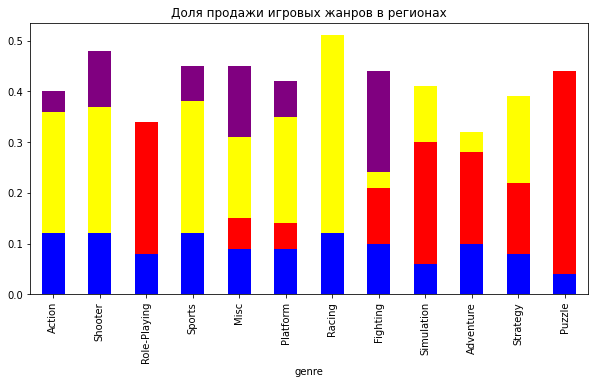

In [200]:
#создание графиков для каждого региона по долям продаж разных игровых жанров
portrait_user_genre_part['na_sales'].plot(kind = 'bar', figsize=(10,5), color='purple', title = 'Доля продажи игровых жанров в регионах')
portrait_user_genre_part['eu_sales'].plot(kind = 'bar', figsize=(10,5), color='yellow', title = 'Доля продажи игровых жанров в регионах')
portrait_user_genre_part['jp_sales'].plot(kind = 'bar', figsize=(10,5), color='red', title = 'Доля продажи игровых жанров в регионах')
portrait_user_genre_part['other_sales'].plot(kind = 'bar', figsize=(10,5), color='blue', title = 'Доля продажи игровых жанров в регионах')

Вывод: Наиболее популярными жанрами игр в Америке являются: Fighting, Misc, Shooter, Sports, Platform.
Наиболее популярными жанрами игр в Европе явяются: Racing, Sports, Shooter, Action, Platform.
Наиболее популярными жанрами игр в Японии являются: Puzzle, Role-Playing, Simulation, Adventure, Strategy.
Наиболее популярными жанрами игр в остальных регионах являются: Action, Shooter, Racing, Sports, Adventure. 

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

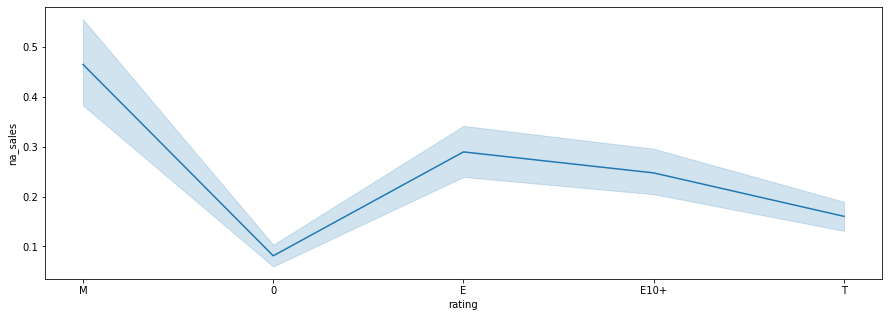

In [201]:
#влияние рейтинга ESRB на продажи в Америке
plt.figure(figsize = (15, 5))
sns.lineplot(x=portrait_data['rating'],y=portrait_data['na_sales'])

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

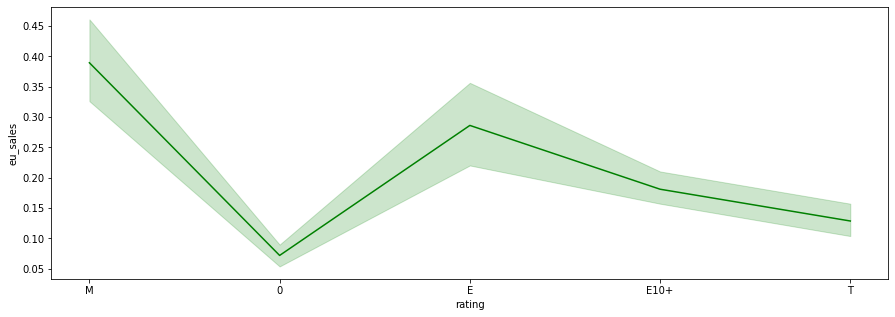

In [202]:
#влияние рейтинга ESRB на продажи в Европе
plt.figure(figsize = (15, 5))
sns.lineplot(x=portrait_data['rating'],y=portrait_data['eu_sales'], color = 'green')

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

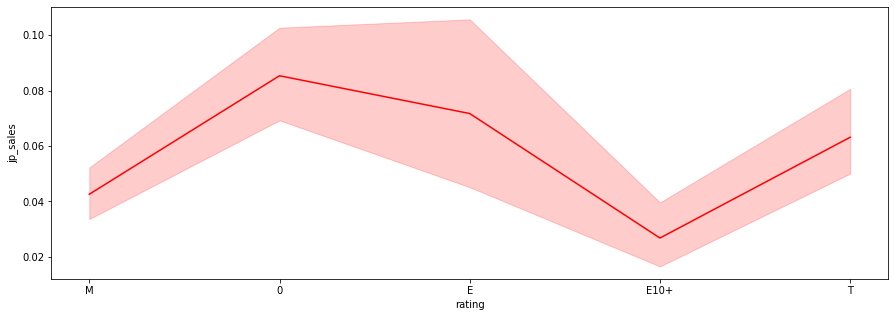

In [203]:
#влияние рейтинга ESRB на продажи в Японии
plt.figure(figsize = (15, 5))
sns.lineplot(x=portrait_data['rating'],y=portrait_data['jp_sales'], color ='red')

<AxesSubplot:xlabel='rating', ylabel='other_sales'>

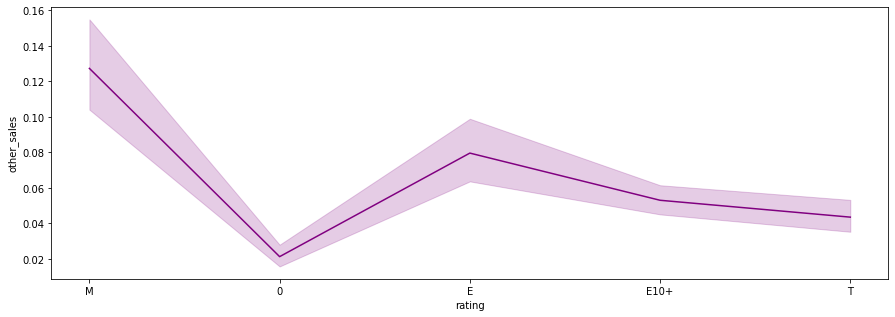

In [204]:
#влияние рейтинга ESRB на продажи в других регионах
plt.figure(figsize = (15, 5))
sns.lineplot(x=portrait_data['rating'],y=portrait_data['other_sales'], color = 'purple')

Вывод: Самая популярная возрастная категория в Америке: М, Е. 
Самая популярная возрастная категория в Европе: М, Е.
Самая популярная возрастная категория в Японии: от 0 лет. 
Самая популярная возрастная категория в остальных регионах: М, Е. 

## Проверка гипотез

### Выполнение задания проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
***
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные 

In [205]:
#создание выборок
xbox_one = list(portrait_data[(portrait_data['platform'] == 'XOne') & (portrait_data['user_score'] != 0)]['user_score'])
pc = list(portrait_data[(portrait_data['platform'] == 'PC') & (portrait_data['user_score'] != 0)]['user_score'])

In [206]:
#проверка гипотезы
alpha = 0.01 

results = st.ttest_ind(
    xbox_one, 
    pc) 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080703899813
Не получилось отвергнуть нулевую гипотезу


Вывод: Нулевая гипотеза сформулирована в задании и звучит как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", тогда альтернативная гипотеза формулируется исходя из нулевой и является утверждением, которое принимается верным, если отбрасывается нулевая гипотеза, в данном случае сформулирована как "Средние пользовательские рейтинги платформ Xbox One и PC разные". Применили метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как выборки одинакового размера, выборочные средние, которые получаются, нормально распределены. По итогам расчета вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC разные составляет 27%.  

### Выполнение задания проверки гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
***
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [207]:
#создание выборок
action = list(portrait_data[(portrait_data['genre'] == 'Action') & (portrait_data['user_score'] != 0)]['user_score'])
sports = list(portrait_data[(portrait_data['genre'] == 'Sports') & (portrait_data['user_score'] != 0)]['user_score'])

In [208]:
#проверка гипотезы
alpha = 0.01

results = st.ttest_ind(
    action, 
    sports)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.716303985528181e-26
Отвергаем нулевую гипотезу


Вывод: Альтернативная гипотеза сформулирована в задании и звучит как "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные", тогда нулевая гипотеза формулируется исходя из альтернативной, в данном случае сформулирована как "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". Применили метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как выборки одинакового размера, выборочные средние, которые получаются, нормально распределены. По итогам расчета делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод по проделанной работе

1. Импортированы необходимые для работы библиотеки, прочитан файл:
- в результате знакомств с данными выявлено: названия столбцов оформлены с заглавной буквы, столбец с данными о годах (year_of_release) имеет не целочисленный формат, есть пропущенные значения в столбцах;
2. Была проведена предобработка данных, выявлены пропущенные значения, приведение названия столбцов к нижнему регистру, проанализированы уникальные значения каждого столбца датафрейма, устранены некорректные значения "tbd" в столбце user_score, удаленые пустые строчки столбца year_of_release и name, также изменены типы данных столбцов year_of_release (приведено к int), user_score (приведено к float), заполнены пропущенные значения столбца critic_score нулями, значения столбца rating тоже заполнены нулями (будем считать, что ограничений нет), также датафрейм проверен на дубликаты. Причины, которые могли повлечь к пропускам в данных: пропуски бывают трех типов - полностью случайные (пропуск не зависит ни от каких-либо других значений), случайные (пропуск зависит от других значений в датафрейме, но не от собственного столбца) и неслучайные (пропуск зависит от значений датафрейма, в том числе и от значений собственного столбца). Поэтому причинами появления пропусков в исходных данных могут быть: человеческий фактор, потеря данных, ошибка в записи данных, намеренно не заполнили данные, как например в столбце rating, user_score, critic_score (особенно актуально для игр выпуска до 2000 года). 
3. Проведен исследовательский анализ данных, выявлены следующие закономерности: 
- наибольшее количество игр выпускалось в 2008, 2009 году, далее постепенно идет на спад, и продажи снова возрастают в 2014, 2015 году. Данные за все периоды можно не брать, если необходимо сделать прогноз на 2017 год, то можно в расчет взять данные с 2012 года;
- наиболее популярные платформы по продажам: PS2, X360, PS3, Wii, DS, PS. Жизненный цикл платформ составляет примерно 8-10 лет. Многие платформы до начала 2000 годов устарели. Пик по продажам PS2 например был в 2004 году, пик по продажам X360 был в 2010 году, пик по продажам PS3 был в 2011 году, пик по продажам Wii был в 2009 году, пик по продажам DS был в 2007 году, пик по продажам PS был в 2007 году;
- выбраны топ-3 потенциально прибыльных платформ, начиная с 2012 года: PS4, PS3, X360. Наименее прибыльные платформы: Wii, DS, PSP;
- на графике диаграммы размаха есть выбросы по каждой из популярных платформ, это приходится на пик продаж каждой платформы c 2012 года. Эти платформы выпускали наиболее популярные игры, такие как Grand Theft Auto, Call of Duty, FIFA, Minecraft, Fallout, The Witcher и другие. 
- Для выявления зависимости между оценками пользователей, оценками критиков и суммарными продажами выбрана самая популярная платорма PS4. Зависимость между оценками критиков и продажами платформы составила 41%, зависимость между оценками пользователей и продажами платформы составила -3%. Корреляции между оценками критиков, оценками пользователей и продажами отличаются. При выборе той или иной платформы, пользователь руководствуется оценками критиков;
- Зависимость между оценками пользователей и продажами различных платформ составило 0.4%, зависимость между оценками критиков и продажами различных платформ составило 31%. Корреляции между оценками критиков, оценками пользователей и продажами отличаются. При выборе той или иной платформы, пользователь руководствуется оценками критиков;
- Самыми прибыльными жанрами игр являются Shooter, Sports, Platform, Action, Racing. Самыми неприбыльными жанрами игр являются Adventure и Puzzle;
4. Составлен портрет пользователей в Америке, Европе, Японии и остальных регионах:
- наиболее популярными платформами в Америке являются: X360, XOne, WiiU, Wii, DS. Наиболее популярными платформами в Европе являются: PC, PS4, Wii, PS3, XOne. Наиболее популярными платформами в Японии являются: PSP, 3DS, PSV, DS, WiiU. Наиболее популярными платформами в остальных регионах являются: PS4, PS3, PSV, XOne, X360;
- наиболее популярными жанрами игр в Америке являются: Fighting, Misc, Shooter, Sports, Platform. Наиболее популярными жанрами игр в Европе явяются: Racing, Sports, Shooter, Action, Platform. Наиболее популярными жанрами игр в Японии являются: Puzzle, Role-Playing, Simulation, Adventure, Strategy. Наиболее популярными жанрами игр в остальных регионах являются: Action, Shooter, Racing, Sports, Adventure;
- самая популярная возрастная категория в Америке: М, Е. Самая популярная возрастная категория в Европе: М, Е. Самая популярная возрастная категория в Японии: от 0 лет. Самая популярная возрастная категория в остальных регионах: М, Е;
5. Проверены гипотезы: 
- сформулирована нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", альтернативная гипотеза сформулирована как "Средние пользовательские рейтинги платформ Xbox One и PC разные". Применен метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как выборки одинакового размера, выборочные средние, которые получаются, нормально распределены. По итогам расчета вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC разные составляет 27%. 
- сформулирована альтернативная гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные", нулевая гипотеза сформулирована как "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". Применен метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как выборки одинакового размера, выборочные средние, которые получаются, нормально распределены. По итогам расчета делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.